# Directional Variogram

You may use `ExperimentalVariogram` class and calculate directional variograms. If you are interested only in the four leading directions and isotropic variogram then you might use `DirectionalVariogram` class. It provides variograms for:

- `N-S` axis,
- `W-E` axis,
- `NW-SE` axis,
- `NE-SW` axis,
- and isotropic variogram.

## Prerequisites

- **Domain**:
  - understanding what are semivariance and covariance of spatial datasets
  - directional variograms
- **Package**:
  - installation
  - `ExperimentalVariogram` class
- **Programming**:
  - Python basics

## Table of contents

1. Load and visualize input data.
2. Create `DirectionalVariogram` object.
3. Visualize semivariances in different directions.
4. Get specific variogram from the pool of available variograms.

In [1]:
import geopandas as gpd
from pyinterpolate import DirectionalVariogram
import matplotlib.pyplot as plt

In [2]:
VALUE_COL = 'PM2.5'
df = gpd.read_file('data/air_pollution.gpkg', layer='pm2_5')
df.set_index('station_id', inplace=True)

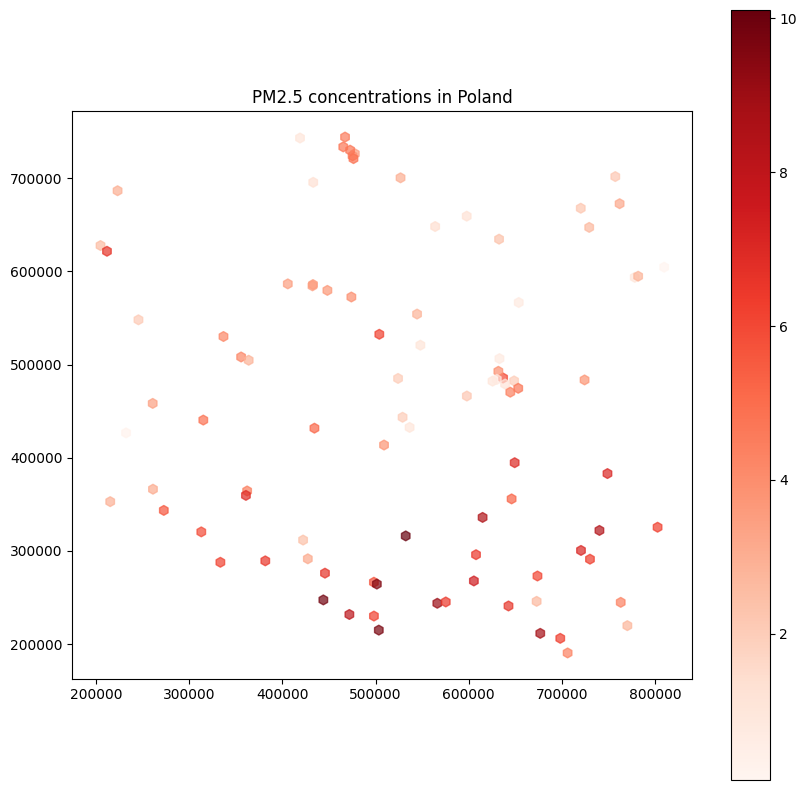

In [3]:
df.plot(figsize=(10, 10), column=VALUE_COL, legend=True, markersize=50, alpha=0.7, marker="h", cmap='Reds')
plt.title('PM2.5 concentrations in Poland')
plt.show()

In [6]:
step_size = 60000  # meters
max_range = 600000  # meters
tolerance = 0.3

dir_vars = DirectionalVariogram(
    ds=df[['geometry', VALUE_COL]],
    step_size=step_size,
    max_range=max_range,
    tolerance=tolerance
)

In [7]:
dir_vars.directions

{'NS': 90, 'WE': 0, 'NE-SW': 45, 'NW-SE': 135}

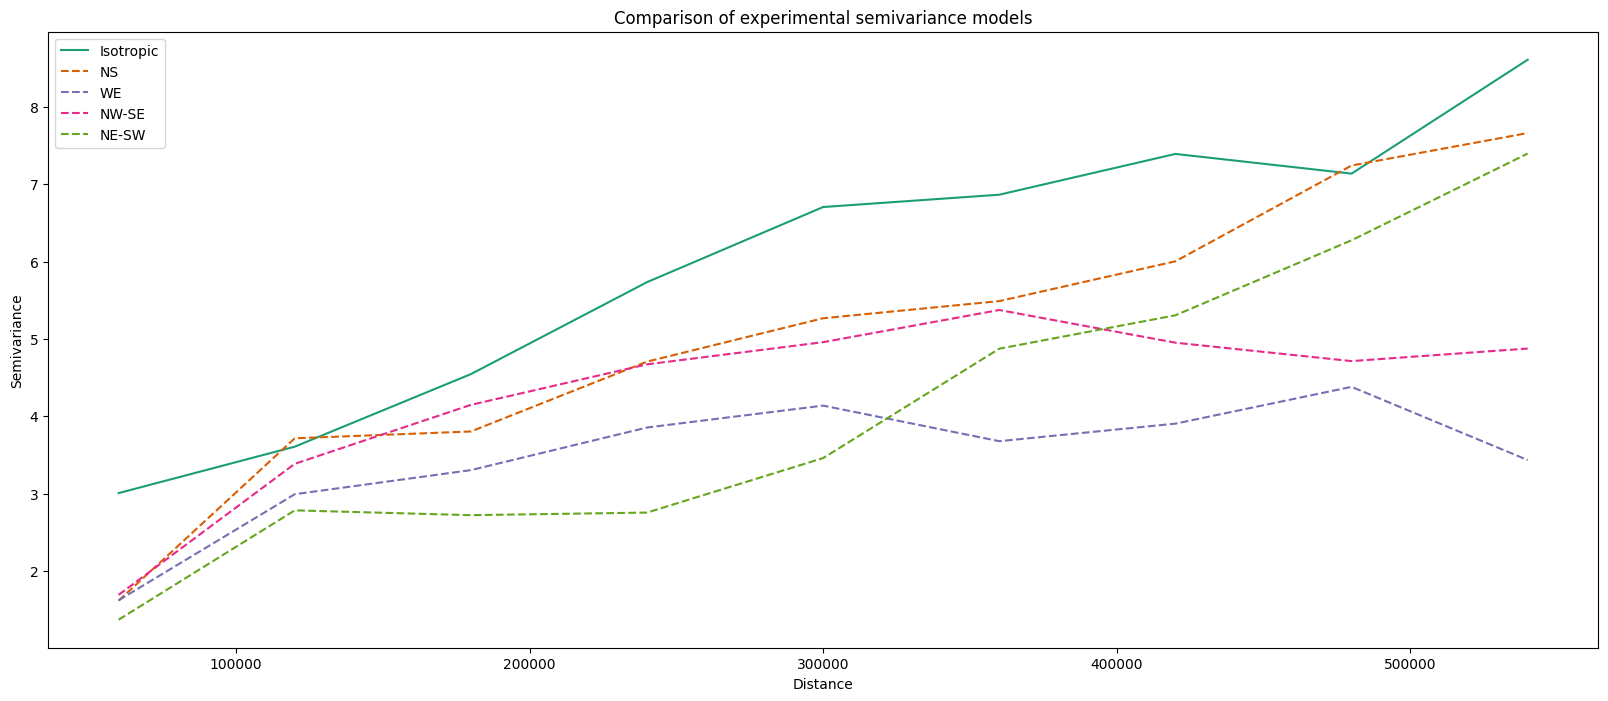

In [8]:
dir_vars.show()

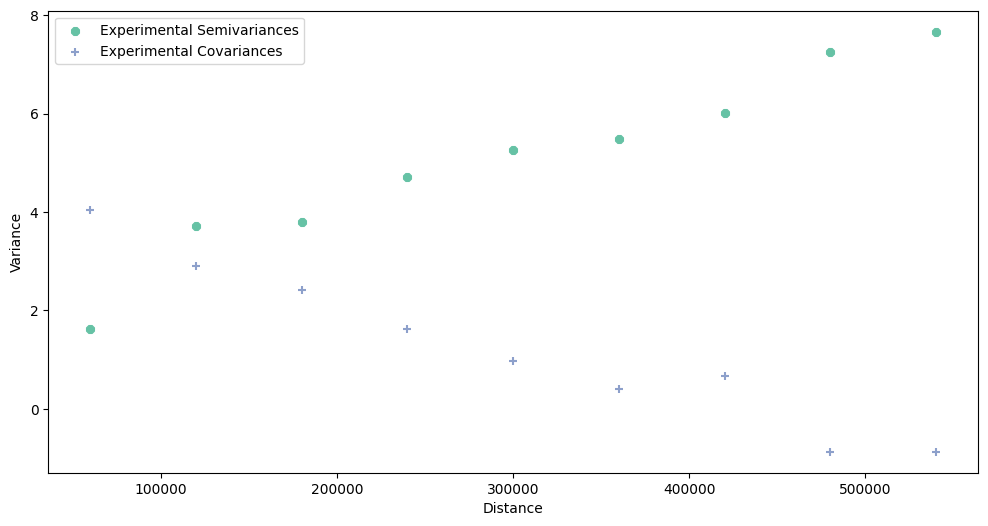

In [9]:
ns_variogram = dir_vars.get('NS')
ns_variogram.plot(variance=False)